In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -Uq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/Types of balls

/content/drive/MyDrive/MasterCourse/Types of balls


In [ ]:
doc(search_images_ddg)

In [ ]:
ball_labels = [
    'Football',
    'Basketball',
    'Volleyball',
    'Rugby',
    'Golf',
    'Cricket',
    'Tennis',
    'Bowling',
    'Billiards',
    'Baseball'
]

In [ ]:
len(ball_labels)

10

In [ ]:
doc(download_images)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for ball_type in ball_labels:
  keyword = ball_type+" only balls images"
  dest = f"{data_path}/{ball_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    ball_image_urls = search_images_ddg(keyword, max_images=300)
    download_images(dest, urls = ball_image_urls)
    print(f"{len(ball_image_urls)} images downloaded in destination: {dest}")

  except:
    continue

300 images downloaded in destination: data/Football
300 images downloaded in destination: data/Volleyball
300 images downloaded in destination: data/Rugby
300 images downloaded in destination: data/Golf
300 images downloaded in destination: data/Cricket
300 images downloaded in destination: data/Tennis
300 images downloaded in destination: data/Bowling
300 images downloaded in destination: data/Billiards
300 images downloaded in destination: data/Baseball


In [ ]:
doc(get_image_files)

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2872) [Path('data/Football/2cacffca-57fa-427a-91db-c696a930c683.jpg'),Path('data/Football/90092a56-a5d7-43ca-8403-afee737f7a8a.jpg'),Path('data/Football/a014ba37-90dd-4963-a7d8-f5b586f414a0.jpg'),Path('data/Football/4f2816b3-f9cd-4512-87b9-8c339e057e2b.jpg'),Path('data/Football/d16eedc5-1109-498a-8c81-e080974ec149.jpg'),Path('data/Football/b853978d-56f7-4745-be3f-1af0ab9b76b9.jpg'),Path('data/Football/c60b19bd-ff40-4372-80d8-2c54a3f9129c.jpg'),Path('data/Football/7d68a3bb-b84c-43f7-b65c-e783bf46a189.jpg'),Path('data/Football/770d8518-eab0-44a0-bca8-39c309ce5605.jpg'),Path('data/Football/49a4d422-72c4-4d51-9ae4-c3faa71479e4.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#96) [Path('data/Football/a11f4dd9-403c-42ef-80e6-eafba6006327.jpg'),Path('data/Football/0a520975-286b-4457-a1ea-345501f64766.jpg'),Path('data/Football/3ed38700-d3e2-4f2c-93b5-a19e8d67f935.jpg'),Path('data/Football/72f9a3ce-c65f-4504-95ad-74bf70ca8928.jpg'),Path('data/Football/4bda1f9a-d4d2-4458-9925-46708cc1bd82.jpg'),Path('data/Football/6b67b20a-571e-4745-b2be-2f3c3a74aab2.png'),Path('data/Football/95e5baab-64dc-466f-85c5-30cd0b981dd0.jpg'),Path('data/Football/047a2773-3479-4188-b3ad-b66a748bb27c.jpg'),Path('data/Football/19b67ded-349d-49ef-b4c2-6b34055ad22e.jpg'),Path('data/Football/bce491a9-01a2-4a41-bfd9-bd4ad3bdff2c.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#96) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2776) [Path('data/Football/2cacffca-57fa-427a-91db-c696a930c683.jpg'),Path('data/Football/90092a56-a5d7-43ca-8403-afee737f7a8a.jpg'),Path('data/Football/a014ba37-90dd-4963-a7d8-f5b586f414a0.jpg'),Path('data/Football/4f2816b3-f9cd-4512-87b9-8c339e057e2b.jpg'),Path('data/Football/d16eedc5-1109-498a-8c81-e080974ec149.jpg'),Path('data/Football/b853978d-56f7-4745-be3f-1af0ab9b76b9.jpg'),Path('data/Football/c60b19bd-ff40-4372-80d8-2c54a3f9129c.jpg'),Path('data/Football/7d68a3bb-b84c-43f7-b65c-e783bf46a189.jpg'),Path('data/Football/770d8518-eab0-44a0-bca8-39c309ce5605.jpg'),Path('data/Football/49a4d422-72c4-4d51-9ae4-c3faa71479e4.jpg')...]

In [ ]:
doc(Path.unlink)

In [ ]:
doc(verify_images)

In [ ]:
doc(DataBlock)

In [ ]:
doc(parent_label)

In [ ]:
doc(ImageBlock)

In [ ]:
doc(CategoryBlock)

In [ ]:
batch_size = 16

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=batch_size)

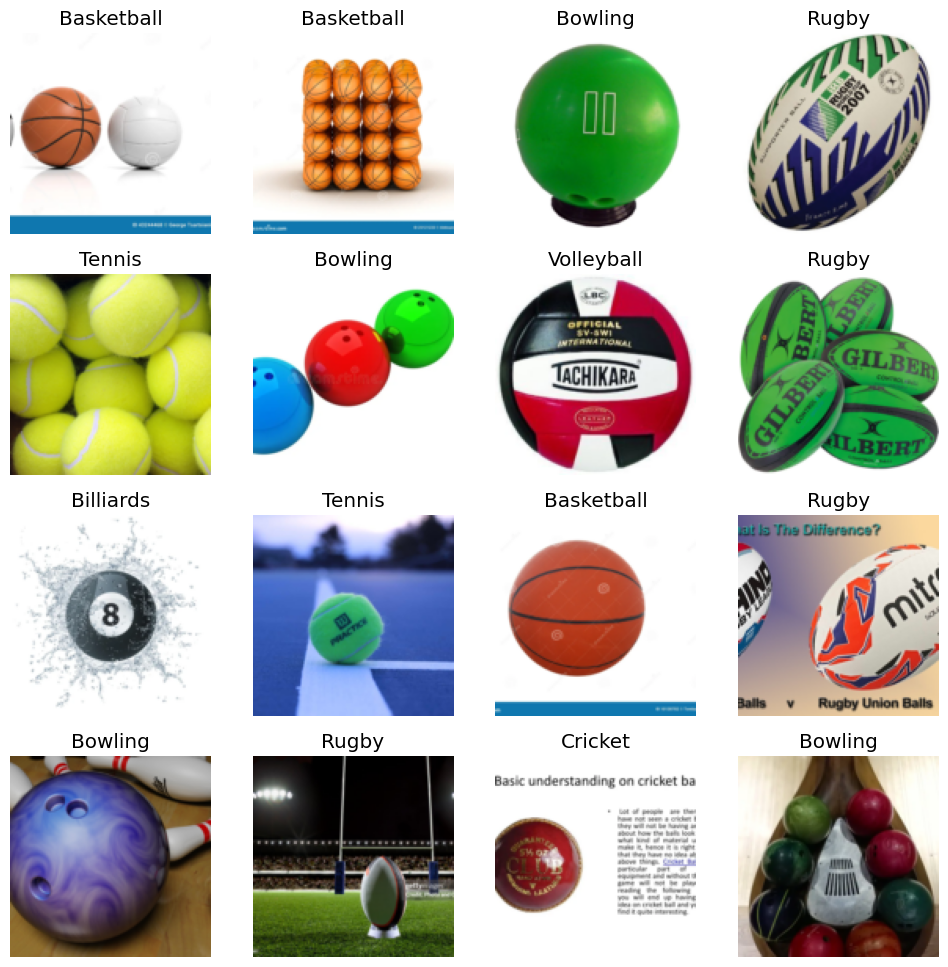

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

In [ ]:
torch.save(dls, "ball_dataloader_v0.pkl")